# The First Stars: Formation under X-ray Feedback -- Structure Visualization

This notebook generates all simulation results figures for my current paper.  All simulations run on stampede.tacc.utexas.edu

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

In [3]:
import pyGadget

Use the final snapshot of the vanilla simulation.

In [4]:
sims = ['xr_tau_J0', 'xr_tau_J1', 'xr_tau_J2', 'xr_tau_J3']
#sims = ['vanilla', 'XR_sfr_1e-3', 'XR_sfr_1e-2', 'XR_sfr_1e-1']
n0 = [306, 327, 271, 235]
n5k = [1851, 1870, 1810, 1758]
#n5k = [1900, 1794, 1701, 1700]
t0 = '_t0'
t5k = '_t5k'
vsnap, nsnap, tag = 615, n5k, t5k

In [5]:
simV = pyGadget.sim.Simulation('stampede/vanilla')
snapV = simV.load_snapshot(vsnap, track_sinks=True)

Turning on gas particle refinement.
There are 7999128 highest resolution particles.
Tracking sinks.
1 sinks found.


In [8]:
snapV.gas.orient_box(centering='avg', view='face', dens_lim=1e8)

Center averaged over 4282 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 8.028e-08 -4.562e-09 7.301e-08
Center averaged over 4282 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: -1.810e-02 3.377e-02 9.048e-03
Using density limit 100000000.0 for orientation.


Calculating...
Center averaged over 4282 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: -5.929e-03 -5.932e+00 -6.316e+00
 x:: max: 2.497e+03 min: -2.499e+03
 y:: max: 2.498e+03 min: -2.499e+03
ndensity:: min: 5.021e+07 max: 7.096e+11
log(ndensity):: min: 7.701e+00 max: 1.185e+01


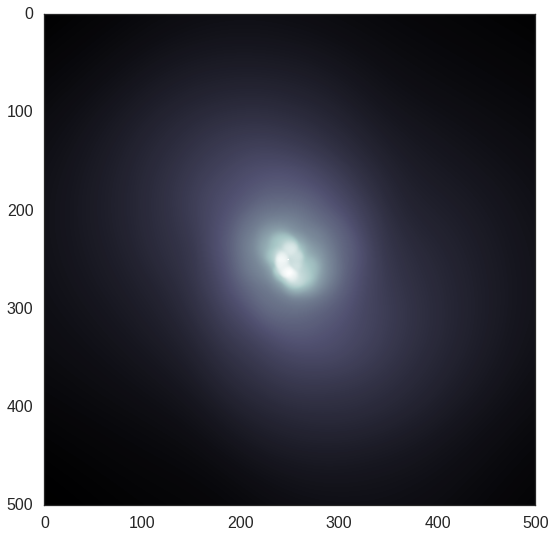

In [9]:
img = pyGadget.visualize.project(snapV, 'ndensity', '5000AU', 'xy', centering='avg', depth=2.)
plt.imshow(img[2], cmap=plt.cm.bone)

Calculating...
Center averaged over 4282 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.929e-14 2.888e-14 -1.459e-14
 x:: max: 2.499e+03 min: -2.499e+03
 y:: max: 2.500e+03 min: -2.493e+03
ndensity:: min: 1.980e+07 max: 6.438e+11
log(ndensity):: min: 7.297e+00 max: 1.181e+01


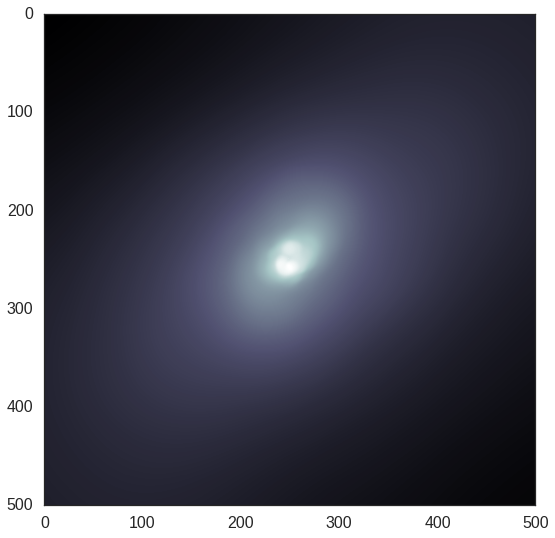

In [10]:
img = pyGadget.visualize.project(snapV, 'ndensity', '5000AU', 'xz', centering='avg', depth=2.)
plt.imshow(img[2], cmap=plt.cm.bone)

Calculating...
Center averaged over 4282 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 0.000e+00 0.000e+00 -1.459e-14
 x:: max: 2.492e+03 min: -2.499e+03
 y:: max: 2.500e+03 min: -2.493e+03
ndensity:: min: 3.059e+07 max: 6.468e+11
log(ndensity):: min: 7.486e+00 max: 1.181e+01


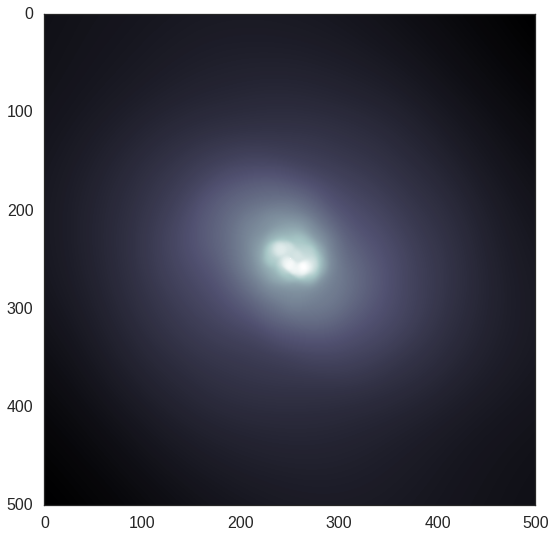

In [11]:
img = pyGadget.visualize.project(snapV, 'ndensity', '5000AU', 'yz', centering='avg', depth=2.)
plt.imshow(img[2], cmap=plt.cm.bone)

# 4 Panel Simulation Comparison Plots

For each sim, picking the snapshot just prior to the formation of the first sink.

In [6]:
simlist = []
snaplist = []
for i,simname in enumerate(sims):
    sim = pyGadget.sim.Simulation('stampede/'+sims[i])
    sim.set_coordinate_system('physical')
    snap = sim.load_snapshot(nsnap[i], track_sinks=True)
    snap.gas.orient_box(centering='avg', view='face', dens_lim=9e11)
    simlist.append(sim)
    snaplist.append(snap)

Turning on gas particle refinement.
There are 7996691 highest resolution particles.
Tracking sinks.
3 sinks found.
Center averaged over 1926 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.758e+00 2.754e+00 2.720e+00
Center averaged over 1926 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 3.535e-01 3.817e-01 -7.817e-01
Turning on gas particle refinement.
There are 7998350 highest resolution particles.
Tracking sinks.
1 sinks found.
Center averaged over 4686 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.749e+00 2.746e+00 2.712e+00
Center averaged over 4686 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 6.617e-02 -1.150e+00 -2.549e-01
Turning on gas particle refinement.
There are 7995490 h

## Disk Structure

### Density structure

In [7]:
import copy
imlist = []
sinklist = []
scale = '15000AU'

#shifty = [None, None, 5000, -2000, None, None, None, None]
shifty = [None, None, None, None, None, None, None, None]

count = 0
for i,view in enumerate(['xy', 'xz']):
    for snap in snaplist:
        imlist.append(pyGadget.visualize.project(snap, 'ndensity', scale, view, centering='avg', 
                                                 depth=2., shifty=shifty[i], dens_lim=None))
        sinklist.append(copy.deepcopy(snap.sinks))
#    snap.close()

Calculating...
Center averaged over 1926 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.689e+08 5.681e+08 5.611e+08
 x:: max: 7.494e+03 min: -7.500e+03
 y:: max: 7.498e+03 min: -7.499e+03
ndensity:: min: 1.139e+06 max: 9.999e+11
log(ndensity):: min: 6.057e+00 max: 1.200e+01
Calculating...
Center averaged over 4686 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.671e+08 5.664e+08 5.593e+08
 x:: max: 7.492e+03 min: -7.498e+03
 y:: max: 7.500e+03 min: -7.498e+03
ndensity:: min: 2.091e+06 max: 7.374e+11
log(ndensity):: min: 6.320e+00 max: 1.187e+01
Calculating...
Center averaged over 1009 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.632e+08 5.628e+08 5.558e+08
 x:: max: 7.492e+03 min: -7.495e+03
 y:: max: 7.498e+03 min: -7.493e+03
ndensity:: min: 1.583e+06 max: 

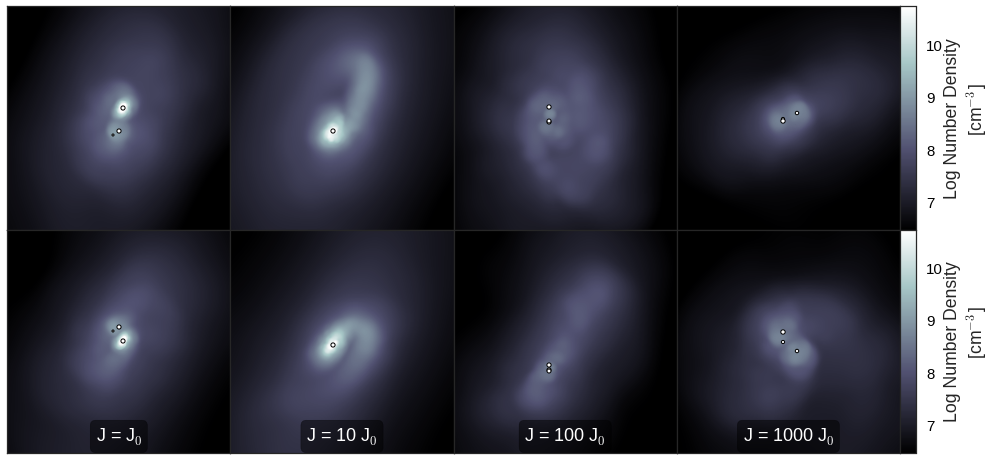

In [8]:
from mpl_toolkits.axes_grid1 import ImageGrid

sim = ['J = J$_{0}$', 'J = 10 J$_{0}$', 'J = 100 J$_{0}$', 'J = 1000 J$_{0}$']
bbox_props = dict(boxstyle="round", fc="k", ec="k", alpha=0.5)
ticks = [(7,8,9,10,11),(6,7,8,9,10)]

fig = plt.figure(1, (20, 8), dpi=600)
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (2, 4), # creates 4x2 grid of axes
                axes_pad=0.0, # pad between axes in inch.
                cbar_mode = 'edge', cbar_location = 'right', cbar_size='7%', cbar_pad=0.0
                )
for i in range(8):
    x = imlist[i][0]
    y = imlist[i][1]
    im = imlist[i][2]
    ax = grid[i]
    img = ax.imshow(im, extent=[x.min(),x.max(),y.min(),y.max()], cmap=plt.cm.bone, origin='lower')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    img.set_clim((6.5,10.75))
    #img.set_clim((8,12))
    
    cb = plt.colorbar(img, cax=grid.cbar_axes[i])
    #cb.set_ticks(ticks[i/4])
    cb.set_ticks((7,8,9,10))
    cb.ax.tick_params(left='on', labelsize=15, labelcolor='k')
    #if clabel[i]: 
    cb.set_label('Log Number Density \n    [cm$^{-3}$]')
    
    for sink in sinklist[i]:
        #mscale = sink.mass*6./27. + .33
        mscale = np.log(sink.mass) +1
        ax.plot(sink.x, sink.y, 'wo', ms=mscale, mew=1)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())

    if i > 3:
        cb.set_ticks(ticks[i/4])
        ax.text(0.5, 0.025, sim[i-4], color='w', ha='center', va='bottom', size=18, 
                transform=grid[i].transAxes, bbox=bbox_props)

plt.show()
fig.savefig('figures/structure/disks-tau.png', bbox_inches='tight', dpi=100)